How to use this notebook: 

This notebook is not designed to be run in its entirety in sequence.  Sections can be run as appropriate.  

# inputs

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import h5py
import sys
import os
import time
import scipy
import scipy.io as scio
from scipy.optimize import curve_fit


from LCLSDataToolsNew.GeneralTools import *
from LCLSDataToolsNew.filterTools import *
from LCLSDataToolsNew.diffSignalTools import *
from LCLSDataToolsNew.binningToolsErr import *
from LCLSDataToolsNew.anisotropyToolsAll import *
from LCLSDataToolsNew.SVDTools import *
from LCLSDataToolsNew.SetUpFns import *
from LCLSDataToolsNew.DiffBinFns import *
from LCLSDataToolsNew.ReduceFns import *
from LCLSDataToolsNew.IRFtools import *
from LCLSDataToolsNew.plottingTools import *

print('Import Complete!')

exper = 'xcsl1008621'

### s3df ###
smalldata_folder='/sdf/data/lcls/ds/xcs/'+exper+'/hdf5/smalldata/'

## set output path as desired
outpath='/sdf/data/lcls/ds/xcs/'+exper+'/results/ReducedData/'

# #make directories if needed 
if os.path.isdir(outpath+'/figures/')==False:
    os.makedirs(outpath+'/figures/')
if os.path.isdir(outpath+'/npy/')==False:
    os.makedirs(outpath+'/npy/')


Import Complete!


## set up varDict

In [3]:
varDict = {
        'ipm4'          : 'ipm4/sum',
        'ipm5'          : 'ipm5/sum',
        'xray_status'   : 'lightStatus/xray',
        'laser_status'  : 'lightStatus/laser',
        'ebeam_hv'      : 'ebeam/photon_energy',
        'scan_vec'      : 'scan/var0',
        'laser_diode'   : '/diodeGon/channels/',
    
        ## tt variables
        'ttCorr'        : 'tt/ttCorr',
        'ttAMPL'        : 'tt/AMPL',
        'ttFWHM'        : 'tt/FLTPOSFWHM',
        'ttFLTPOS'      : 'tt/FLTPOS',
        # 'ttFLTPOS_PS'   : 'tt/FLTPOS_PS', ## in picoseconds
        'encoder'       : 'enc/lasDelay',
        'lxt'           : 'epics/lxt' , 
        # 'lxt_ttc'       : 'epics/lxt_ttc',
        
        ## scattering variables
        'azav'      : 'epix10k2M/azav_azav',
        'qs'        : 'UserDataCfg/epix10k2M/azav__azav_q',
        'phis'      :  'UserDataCfg/epix10k2M/azav__azav_phiVec',
    
        ## scattering detector error
        #'azav_sqr'     :  'epix10k2M/azav_azav_square',
        # 'pix_per_azav'  :  'UserDataCfg/epix10k2M/azav__azav_norm',
    

        }

## set up paramDict

In [3]:
setbins=np.arange(-0.5e-12,6e-12,.02e-12)



paramDict= {
        'binSetup'  : 'points',
        'binSet2'   : 150,
        'binMethod' : 'ave', 
        'qnorm'     : (3,4), 
        'qrange'    : (0.5,4),
        'show_filters'  : True, #show filter plots
        'useAzav_std'  : False, 
        'azav_percent_filter' : None, 
                    
        'ipm'    : 5, # select ipm to use for I0
        'corr_filter' : True,
        'corr_threshold': .03 , 
        'ipm_filter' : (1000,None), #set limits for ipm intensity
        'Iscat_threshold'  : 10, #lower limit for Iscat

        'use_TT'   :  True,  
        'scan_var' : None,
        'x_var'   : None,

        't0_corr' : None,  #false or float offset for time zero
        'enforce_iso': False, #enforce isotropic off shots?
        'energy_corr' : False, # ebeam photon energy correction
        'NonLin_corr': None, #None, SVD, poly, or SVDbyBin

        'AdjSub'    : 50, #number of adjascent off shots to average and subtract, -1 subtracts all
        'aniso'  : False,
        'shift_n' :0,
        'xstat' : True,

        'BackSub': None,
        'earlytrange':(-0.5e-12,0e-12),

        'showSVD': False, #do svd
        'SVD_n': 4, # number of svd components
        'slice_plot': None, #how to slice up plots displayed at end
        'smooth':None, #smoothing before svd?

        'overwrite' : True, # overwrite files? 
        'save_mat'  : False,
        'save_h5' : True,
        

    }

In [ ]:
### for lens or power scans
p2={ 'binSetup'  : 'unique',
    'corr_filter' : False,
    
    'use_TT' : False, 
   }

paramDict.update(p2)

# Run Reduction

loading  /reg/d/psdm/xcs/xcslv9618/hdf5/smalldata/xcslv9618_Run0419.h5
basename is  xcslv9618_Run0419
scan variable is  newdelay
finished loading h5
calculated Iscat
setupFilters - done!
making correlation filter
correlation equation = 1.219471e-02 x +2.543803e+00
fraction of data kept 8.444561e-01
TTFWHM: fraction_kept  0.9907327728867412  lower  95.74443612065132  upper  140.77516712675657
TTPOS: fraction_kept  0.9913821677162744  lower  256.7141489365753  upper  553.0137779510655
4.133465528488159  seconds
saved reduction.png
t=(encoder + tt/ttCorr)*1e-12


/cds/home/s/slraj/code/ScatteringCode/LCLSDataToolsNew/DiffBinFns.py:106: RuntimeWarning: Mean of empty slice
  darkMean = np.nanmean(dark,0)


x-ray off subtraction done!
normalize data
(530,) (25003, 11, 530)


/cds/home/s/slraj/code/ScatteringCode/LCLSDataToolsNew/DiffBinFns.py:149: RuntimeWarning: Mean of empty slice
  cake=np.nanmean(divAny(cspad_azav[early_x,:,:],normal_factor[early_x,:]),0) #normalize by norm


normalize data done!
normalization applied
starting difference signal
Difference Signal Done!
13.03558087348938  seconds
Starting binning
bin by points, 150 per bin
dict_keys(['xcenter', 'xmean', 'xstd', 'bincount', 'binmean', 'binstd'])
binning - done!
14.195796728134155  seconds
saved output to /cds/home/s/slraj/code/ScatteringCode/npy/xcslv9618_Run0419_out.npy
14832/25003 events used
saved .h5 output
plotting azavs
logscan False
(99, 530)
(530,)
done
14.959938764572144  seconds


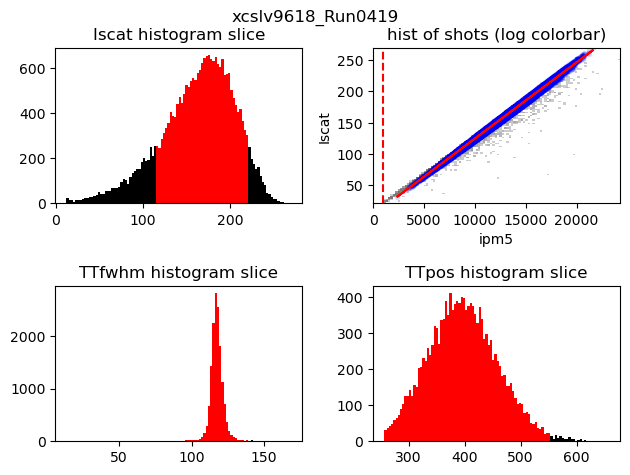

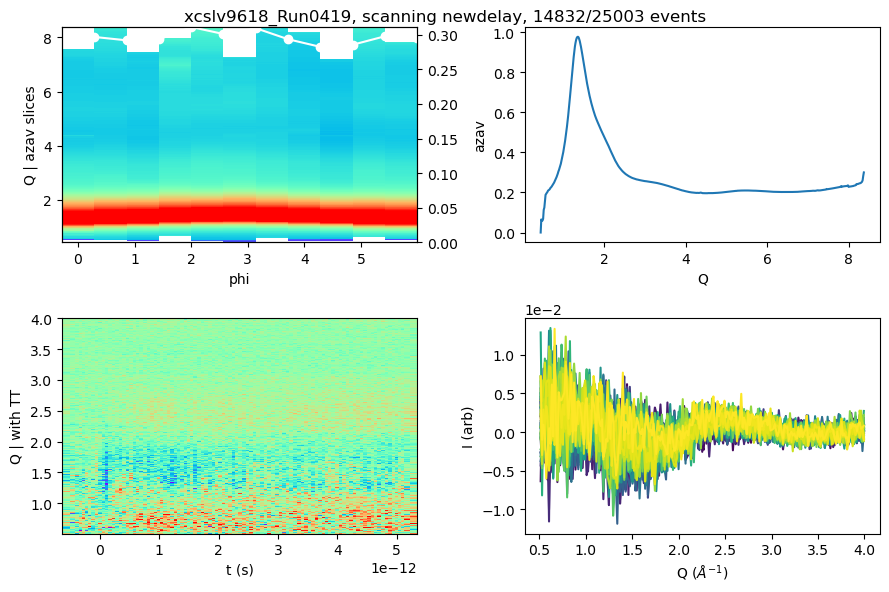

In [4]:
runs=[419]

ReduceData(smalldata_folder,exper,runs,outpath,paramDict,varDict)
    

# Load Data and Plot

In [4]:
runnum=133
filepath=outpath+'/npy/'+exper+'_Run%04i_out.npy' %runnum

data= np.load(filepath,allow_pickle= True).item()

qs=data['qs']
phis=data['phis']

ts=data['xcenter']

diff=data['diff_bin']
try:
    S0=data['S0']
    S2=data['S2']
except:
    print('no aniso')

no aniso


/tmp/ipykernel_2754014/4187245029.py:4: RuntimeWarning: Mean of empty slice
  diff2d=np.nanmean(diff,1)


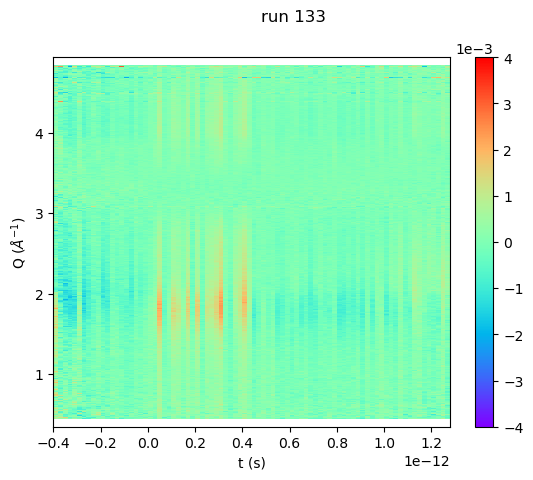

In [5]:
# plot azimuthal average

goodt,trange=chooseR(-22e-12,23.5e-12,ts)
diff2d=np.nanmean(diff,1)
plot_2d(ts[goodt],qs,diff2d[goodt,:],ccmap='rainbow')
plt.suptitle('run %i'%runnum)
plt.clim(-4e-3,4e-3)

## do anisotropy

In [6]:

S0, err_S0, S2, err_S2=S0S2P(diff,phis,fil=None,shift_n=0,deg=None)

shift is 0 degrees
84


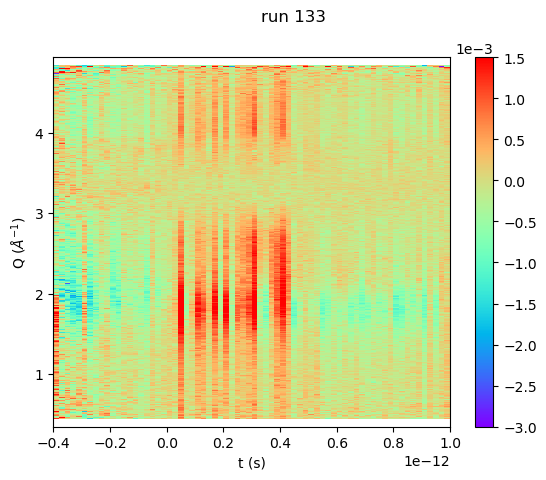

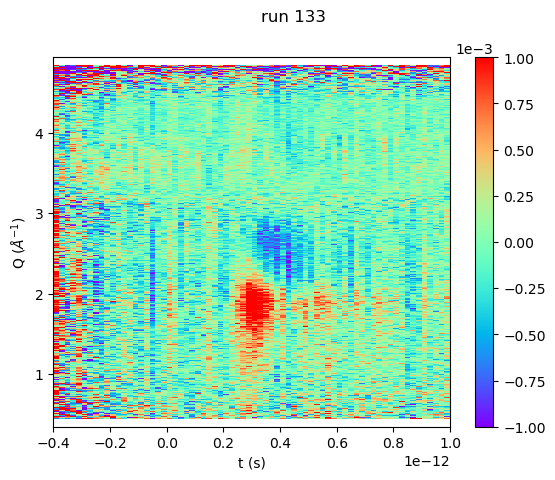

In [8]:
#plot

goodt,trange=chooseR(-.5e-12,1e-12,ts)

plot_2d(ts[goodt],qs,S0[goodt,:],ccmap='rainbow')
plt.suptitle('run %i'%runnum)
plt.clim(-3e-3,1.5e-3)


plot_2d(ts[goodt],qs,S2[goodt,:],ccmap='rainbow')
plt.suptitle('run %i'%runnum)
plt.clim(-1.e-3,1.e-3)

/sdf/home/s/slraj/code/ScatteringCode/LCLSDataToolsNew/anisotropyToolsAll.py:334: RuntimeWarning: Mean of empty slice
  cake=np.nanmean(dat,0)


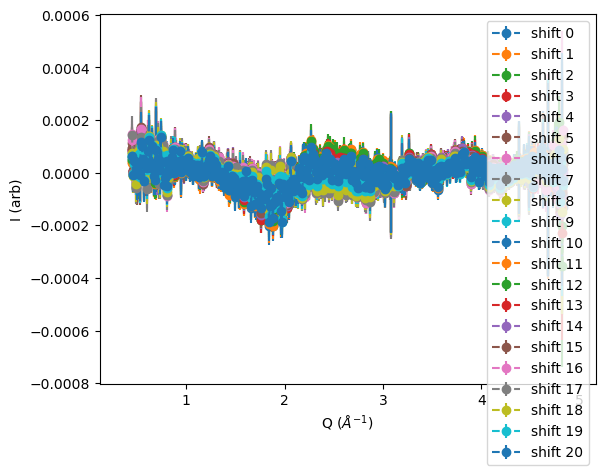

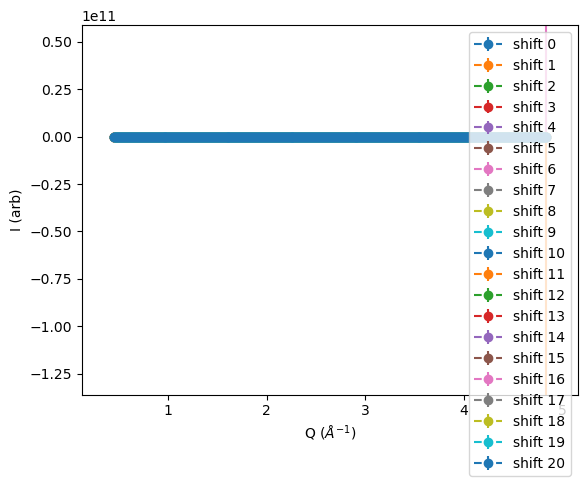

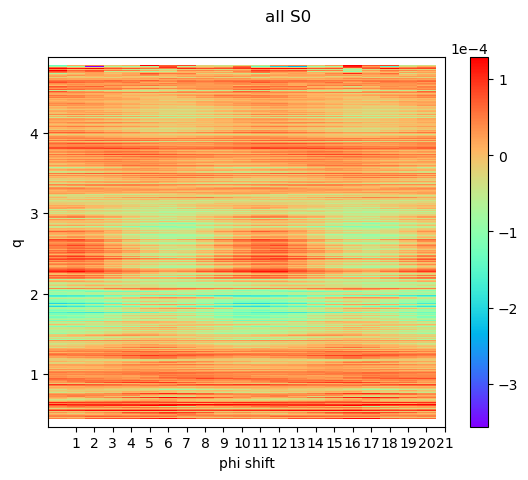

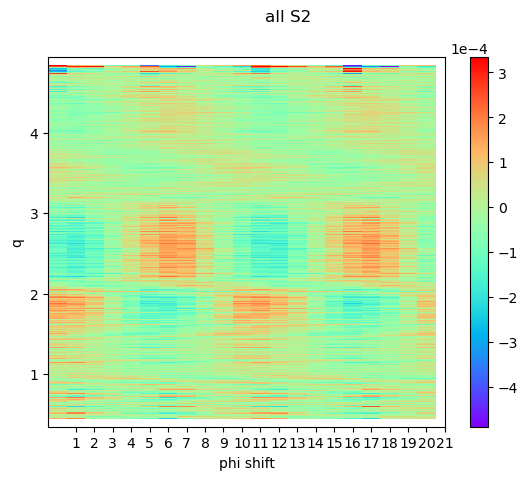

In [9]:
#check phi offset
all_S0, all_S2=S0S2_check(diff,qs,phis,trange='All',lim=None,calc2=False)

# Load Data and Fit Gaussian

In [6]:
def gaus(x, a, b, c, d):
    return a * np.exp(-1*(x-b)**2/2/c**2) + d

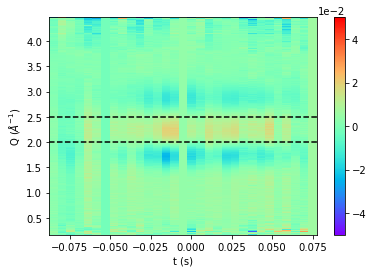

In [23]:
## load and plot 2D data
runnum=328
filepath=outpath+'/npy/'+exper+'_Run%04i_out.npy' %runnum

data= np.load(filepath,allow_pickle= True).item()

qs=data['qs']
phis=data['phis'][0:-1]
scanvar=data['xcenter']
diff=data['diff_bin']

#plot 2D
goodq,qrange=chooseR(1.6,2.3,qs)   
diff2d=np.nanmean(diff,1) #average over phis
plt.figure('scanvar2')
plot_2d(scanvar,qs,diff2d,fig='scanvar2')
plt.axhline(qrange[0],ls='--',color='k')
plt.axhline(qrange[1],ls='--',color='k')
# plt.clim(-5e-2,5e-2)

#take the sum of the absolute difference signal in q range to extract a 1D curve
diff1d=np.nansum(np.abs(diff2d[:,goodq]),1)

In [1]:
## fit 1D curve to gaussian

lens_v=True
lens_v=False

if lens_v:
    p0=[2,.05,.05,0.001] #lensv
    param, err =curve_fit(gaus,scanvar,diff1d,p0=p0)
    
else:
    p0=[2.,0.0,0.01,-0.001] #lensh
    param, err =curve_fit(gaus,scanvar,diff1d,p0=p0)

center=param[1]
fwhm=param[2]*2.355

plt.figure('fit')
plt.plot(scanvar,diff1d,'k.-')
plt.plot(scanvar,gaus(scanvar,*param),'r',label='fit')
if lens_v:
    plt.xlabel('lens_v')
else:
    plt.xlabel('lens_h')
plt.ylabel('diff')
plt.legend()
plt.suptitle(('run=',runnum,'center=',center,'fwhm=',fwhm,'qrange',qrange))

NameError: name 'curve_fit' is not defined

# Load Data and Fit Rise

In [11]:
from scipy.special import erf

def stepfn(x, A,x0,sigma,B):
    return (A/2*erf((x0-x)/sigma)+B)

In [12]:
runnum=133
qrange=(2.2,2.4)
trange=(-2e-12,2e-12)

filepath=outpath+'/npy/'+exper+'_Run%04i_out.npy' %runnum
# filepath='/reg/d/psdm/xcs/xcsx51920/results/ReferenceData/xpp00316_water_data.npy'

data= np.load(filepath,allow_pickle= True).item()
print(data.keys())

qs=data['qs']
ts=data['xcenter']
diff2D=data['S2'] #select 2d data here with dimensions ts x qs


goodq,qrange=chooseR(2.2,2.4,qs)
goodt,trange=chooseR(-2e-12,2e-12,ts)
diff1D=np.nanmean(diff2D[:,goodq],axis=1)
#diff1D=np.nansum(np.abs(diff2D[:,goodq]),axis=1)



plt.figure('S2slice1',figsize=(15,8))
plot_2d(ts[goodt],qs,diff2D[goodt,:],fig='S2slice1',sub=121)
plt.axhline(qrange[0],ls='--',color='k')
plt.axhline(qrange[1],ls='--',color='k')
# plt.xlabel('lxe_opa')


plt.subplot(122)
plt.plot(ts,diff1D)
# plt.xlabel('lxe_opa')
plt.axvline(trange[0],ls='--',color='k')
plt.axvline(trange[1],ls='--',color='k')


dict_keys(['h5name', 'numshots', 'filters', 'normal_factor', 'loff_cake', 'xbin_occupancy', 'xcenter', 'xmean', 'xstd', 'diff_bin', 'diff_std', 'qs', 'phis', 'paramDict', 'numshots_used'])


KeyError: 'S2'

x0= 0.0 fwhm 0.1884


/cds/sw/ds/ana/conda2/inst/envs/ps-4.4.8/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


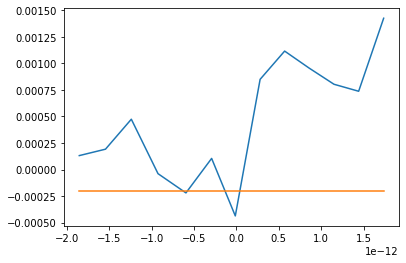

In [19]:

p0=[0.002,0,.08,-.0002] #initial guesses
param, err =curve_fit(stepfn,ts[goodt],diff1D[goodt],p0=p0)

center=param[1]
fwhm=param[2]*2.355
print('x0=',center,'fwhm',fwhm)


plt.figure('fit')
plt.plot(ts[goodt],diff1D[goodt])
plt.plot(ts[goodt],stepfn(ts[goodt],*param),label='fit')
plt.xlabel('t (s)')


# do svd and fit exponential

In [5]:
def exp1(x,A,x0,tau,C):
    return A*np.e**((-1.)*(x-x0)/tau)+C

def exp2(x,A,x0,tau):
    return A*np.e**((-1.)*(x-x0)/tau)

In [15]:
goodt,trange=chooseR(-1.e-12,10e-12,ts)
goodq,qrange=chooseR(0.5,4,qs)

ss,ww,tt=do_svd_protected(qs[goodq],ts[goodt],S0[goodt,:][:,goodq],
                          n=4,smooth=None,showplot=True, fig=None, sub=None,logscan=False)

NameError: name 'S0' is not defined

In [10]:
## plot first time component and fit

t1=ww[0]*tt[:,0]

p0=[-0.6,0.01e-12,4e-12,-0.6] #initial guesses
param, err =curve_fit(exp1,ts[goodt],t1,p0=p0)


plt.figure('fit')
plt.plot(ts[goodt],t1)
plt.plot(ts[goodt],exp1(ts[goodt],*param),label='fit')
plt.xlabel('t (s)')

print(param)

NameError: name 'ww' is not defined

# Stack Runs 

In [16]:
runpath=outpath+'npy/'
runs2=[419,420]

stackDict=StackProccessed(runpath,exper,runs2,method='WAve')

In [18]:
## save stack
outname=exper+'Stack_65_to_70'

np.save(outpath+'/stack_npy/'+outname+'.npy',stackDict)

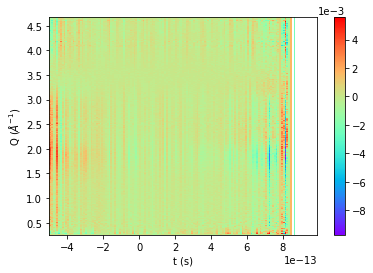

In [49]:
plot_2d(ts,qs,np.nanmean(diff,1).T)

In [17]:

print(stackDict.keys())
diff=stackDict['aveData']
ts=stackDict['ts']
qs=stackDict['qs']
phis=stackDict['phis']

# S0, err_S0, S2, err_S2=S0S2(diff,phis,fil=None,shift_n=1,deg=None)
# outdict=SnFitT(2,diff,qs,phis[:-1],1.3051,shift_n=1)

dict_keys(['aveData', 'errData', 'ts', 'qs', 'phis', 'runs', 'method'])


In [55]:
outdict.keys()

S2=outdict['Sn'][:,:,0]

In [25]:
outdict['Sn'].shape

(99, 883, 2)

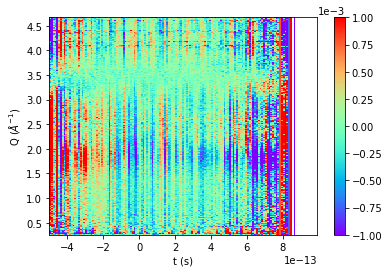

In [57]:
plot_2d(ts,qs,S2)
plt.clim(-1e-3,1e-3)

# Check h5

In [66]:
run = 23
smalldata_folder='/reg/data/drpsrcf/xcs/'+exper+'/scratch/hdf5/smalldata/'

fname=smalldata_folder+ exper+'_Run%04i.h5'%run


with h5py.File(fname, 'r') as d:
    pp='epix_1'
    # pp=''
    # pp='/diodeGon/'
    
    for a in d[pp]:
        try: 
            print(a,d[pp][a][:].shape)
        except:
            print(a)
      
    
    lxt=d['epics/lxt'][:]
    lxt_fast=d['enc/lasDelay'][:]
    laserP=d['/diodeGon/channels/'][:,0]
    filterP = laserP>(np.nanmean(laserP)-np.nanstd(laserP)*3)
    # dropx=d['epix_1/ragged_droplet_photon_i'][:]
    # lxe_opa=d['scan/lxe_opa'][:]
    # var0=d['scan/var0'][:]
    # varStep=d['scan/varStep'][:]
    print('okay','\n')
    print(d['ebeam/photon_energy'][0])
    # print(d['UserDataCfg/epix10k2M/azav__azav_qbins'].shape)
    # ttCorr=d['tt/ttCorr'][:]
    # fltpos=d['tt/FLTPOS'][:]


    # azav=d['epix10k2M/azav_azav'][:]
    # ipm4=d['ipm4/sum'][:]
    # ipm5=d['ipm4/sum'][:]
    # ImSum=d['Sums/epix10k2M_calib'][:]
    # Npix=d['UserDataCfg/epix10k2M/azav__azav_Cake_Npixel'][:]
    # qs=d['UserDataCfg/epix10k2M/azav__azav_q'][:]
    # phis=d['UserDataCfg/epix10k2M/azav__azav_phiVec'][:]

    # Isum=np.nanmean(azav,(1,2))
# pos=np.array([xx,yy])


ROI_0_area (18691, 704, 768)
ROI_0_com (18691, 2)
ROI_0_max (18691,)
ROI_0_mean (18691,)
ROI_0_sum (18691,)
okay 

9609.90675037739


In [71]:
lxt_fast

array([53.37840556, 53.37840556, 53.37840556, ..., 53.37840556,
       53.37840556, 53.37840556])